In [ ]:
from basic_sentence_bert_predict import *

c:\Users\trothe\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:

from tabulate import tabulate

crossentropy_loss_combined = [["MLP, no training","?" ,"0.3507 (0.1603)"],
                            ["MLP [KL-Divergence]","?" , "0.1268 (0.0386)"],
                            ["MLP [JS-Divergence]", "? " ,  "0.3119 (0.1313)"],
                            #["GP Regression", 2.455, 2.455], 
                            ]
table_data_kwargs = {"tabular_data": crossentropy_loss_combined, "headers": [" ", "Headline", "Article Body"]}

table = tabulate(tablefmt="fancy_grid",
                **table_data_kwargs
                )


#Show Output
print("Scores for data split between comments: \n")
print(table)
print("\n In LaTeX, that is: \n")
print(tabulate(tablefmt="latex",
                **table_data_kwargs
                )) 

Scores for data split between comments: 

╒═════════════════════╤════════════╤═════════════════╕
│                     │ Headline   │ Article Body    │
╞═════════════════════╪════════════╪═════════════════╡
│ MLP, no training    │ ?          │ 0.3507 (0.1603) │
├─────────────────────┼────────────┼─────────────────┤
│ MLP [KL-Divergence] │ ?          │ 0.1268 (0.0386) │
├─────────────────────┼────────────┼─────────────────┤
│ MLP [JS-Divergence] │ ?          │ 0.3119 (0.1313) │
╘═════════════════════╧════════════╧═════════════════╛

 In LaTeX, that is: 

\begin{tabular}{lll}
\hline
                     & Headline   & Article Body    \\
\hline
 MLP, no training    & ?          & 0.3507 (0.1603) \\
 MLP [KL-Divergence] & ?          & 0.1268 (0.0386) \\
 MLP [JS-Divergence] & ?          & 0.3119 (0.1313) \\
\hline
\end{tabular}


### Article embeddings

In [ ]:
using FileIO
using CSV

dirpath = "S:\\Sync\\University\\2023_MRP_1\\MRP1_WorkDir\\output_and_results\\"

mean_cosine_sim_mat = CSV.read(dirpath * "base_mean_cosine_sim_mat.csv", Tables.matrix)
gated_cosine_sim_mat = CSV.read(dirpath * "base_gated_cosine_sim_mat.csv", Tables.matrix)

122×123 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 ⋮                        ⋮              ⋱                      ⋮         
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

### Model Predictions

In [1]:
using FileIO
using CSV
using DataFrames
using Statistics
using StatsPlots
# Import prediction data:

using Distances

KLDivergence(x,y) = sum(x .* log.(x ./ y))
JSDivergence(x,y) = 0.5 * KLDivergence(x, (x+y)/2) + 0.5 * KLDivergence(y, (x+y)/2)

JSDivergence (generic function with 1 method)

In [ ]:


dirpath = "S:\\Sync\\University\\2023_MRP_1\\MRP1_WorkDir\\output_and_results\\"
filename = "base_predictions.csv"

preds_df = CSV.read(joinpath(dirpath, filename), DataFrame)

@show names(preds_df)
@show eltype.(eachcol(preds_df))

# Convert values from Strings to 1D arrays of Float64s
liststr_to_arrayfloat64(x) = parse.(Float64, split(x[2:end-1], ","))

@show liststr_to_arrayfloat64.(preds_df[!, :prediction])
#@show liststr_to_arrayfloat64.(preds_df[1:5, :target])
#@show liststr_to_arrayfloat64.(preds_df[1:5, :error])
#@show preds_df[1:5, :error]

names(preds_df) = ["article_id", "prediction", "target", "error", "attention_weights"]
eltype.(eachcol(preds_df)) = DataType[String, String, String, String, Missing]


liststr_to_arrayfloat64.(preds_df[!, :prediction]) = [[0.5703622102737427, 0.04938945546746254, 0.03667768836021423, 0.04029339924454689, 0.3032771646976471], [0.5703108906745911, 0.049407780170440674, 0.03669546917080879, 0.04030802845954895, 0.30327776074409485], [0.5703914761543274, 0.049377601593732834, 0.03667399287223816, 0.040291983634233475, 0.3032650947570801], [0.5703299045562744, 0.049397435039281845, 0.03669033944606781, 0.040306832641363144, 0.30327558517456055], [0.5703373551368713, 0.04939877241849899, 0.03668607771396637, 0.040296442806720734, 0.30328136682510376], [0.5703416466712952, 0.0493999607861042, 0.036688245832920074, 0.040305059403181076, 0.30326515436172485], [0.5703915953636169, 0.0493733286857605, 0.03667062520980835, 0.04028657451272011, 0.3032778799533844], [0.5703583359718323, 0.049384705722332, 0.03667866438627243, 0.040296707302331924, 0.30328166484832764], [0.5703137516975403, 0.049408625811338425, 0.03668666630983353, 0.04030580818653107, 0.303285211

25-element Vector{Vector{Float64}}:
 [0.5703622102737427, 0.04938945546746254, 0.03667768836021423, 0.04029339924454689, 0.3032771646976471]
 [0.5703108906745911, 0.049407780170440674, 0.03669546917080879, 0.04030802845954895, 0.30327776074409485]
 [0.5703914761543274, 0.049377601593732834, 0.03667399287223816, 0.040291983634233475, 0.3032650947570801]
 [0.5703299045562744, 0.049397435039281845, 0.03669033944606781, 0.040306832641363144, 0.30327558517456055]
 [0.5703373551368713, 0.04939877241849899, 0.03668607771396637, 0.040296442806720734, 0.30328136682510376]
 [0.5703416466712952, 0.0493999607861042, 0.036688245832920074, 0.040305059403181076, 0.30326515436172485]
 [0.5703915953636169, 0.0493733286857605, 0.03667062520980835, 0.04028657451272011, 0.3032778799533844]
 [0.5703583359718323, 0.049384705722332, 0.03667866438627243, 0.040296707302331924, 0.30328166484832764]
 [0.5703137516975403, 0.049408625811338425, 0.03668666630983353, 0.04030580818653107, 0.3032852113246918]
 [0.5703

liststr_to_arrayfloat64.((preds_df[!, :prediction])[i]) = [0.5703137516975403, 0.049408625811338425, 0.03668666630983353, 0.04030580818653107, 0.3032852113246918]
(size(ghist_groups), size(ghist_data)) = ((10,), (10,))


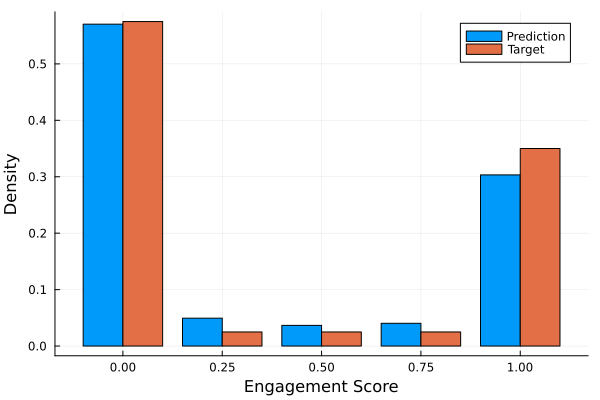

In [ ]:

num_bins = 5 # Engagement score bins
#bin_edges = range(0.0-(1.0-0.0)/(2*(num_bins-1)), 1.0 + (1.0-0.0)/(2*(num_bins-1)), length=num_bins+1)
bin_edges = [-0.125, 0.125, 0.375, 0.625, 0.875, 1.125]

i = 9

@show liststr_to_arrayfloat64.(preds_df[!, :prediction][i])
ghist_data = cat(liststr_to_arrayfloat64.(preds_df[!, :prediction][i]), liststr_to_arrayfloat64.(preds_df[!, :target][i]), dims=1)
ghist_score_vals = repeat(range(0.0, 1.0, num_bins), outer=2)
ghist_groups = repeat(["Prediction", "Target"], inner=num_bins) 

@show size(ghist_groups), size(ghist_data)
groupedbar(ghist_score_vals, ghist_data, group = ghist_groups, xlabel="Engagement Score", ylabel="Density", legend=true)


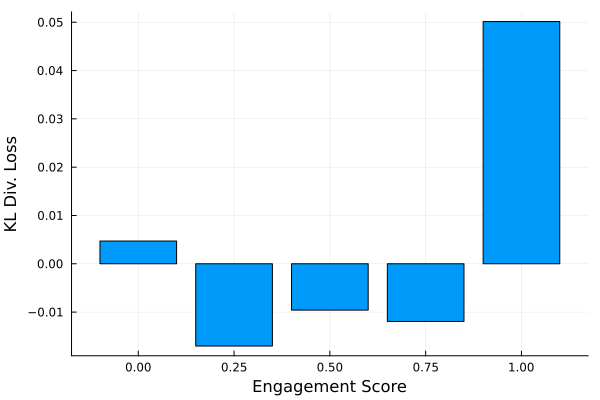

In [ ]:
error_data = liststr_to_arrayfloat64.(preds_df[!, :error][i])
bar(range(0.0, 1.0, num_bins),  error_data, xlabel="Engagement Score", ylabel="KL Div. Loss", legend=false)

In [ ]:

dirpath = "S:\\Sync\\University\\2023_MRP_1\\MRP1_WorkDir\\output_and_results\\"
filename = "alice_base_attention_predictions_with_text.csv"

preds_df = CSV.read(joinpath(dirpath, filename), DataFrame; delim=";")

@show names(preds_df)
@show eltype.(eachcol(preds_df))

# Convert values from Strings to 1D arrays of Float64s
liststr_to_arrayfloat64(x) = parse.(Float64, split(replace(x, "[" => "", "]" => ""), ","))
#nestedliststr_to_arrayfloat64(x) = parse.(Float64,[el[3:end-1] for el in split(x[2:end-1], ",")])


@show liststr_to_arrayfloat64.(preds_df[1:5, :prediction])

names(preds_df) = ["article_id", "subtexts", "prediction", "target", "error", "attention_weights"]


eltype.(eachcol(preds_df)) = DataType[String, String, String, String, String, String]
liststr_to_arrayfloat64.(preds_df[1:5, :prediction]) = [[0.5793056488037109, 0.047385234385728836, 0.0351298451423645, 0.04187140241265297, 0.29630783200263977], [0.5774639248847961, 0.047796957194805145, 0.03552427515387535, 0.04235643148422241, 0.29685840010643005], [0.5864147543907166, 0.04636019095778465, 0.03424745798110962, 0.04090804234147072, 0.29206952452659607], [0.5890020132064819, 0.04588615521788597, 0.033800240606069565, 0.04043827950954437, 0.290873259305954], [0.565539538860321, 0.050520576536655426, 0.03789297863841057, 0.04503243789076805, 0.3010144829750061]]


5-element Vector{Vector{Float64}}:
 [0.5793056488037109, 0.047385234385728836, 0.0351298451423645, 0.04187140241265297, 0.29630783200263977]
 [0.5774639248847961, 0.047796957194805145, 0.03552427515387535, 0.04235643148422241, 0.29685840010643005]
 [0.5864147543907166, 0.04636019095778465, 0.03424745798110962, 0.04090804234147072, 0.29206952452659607]
 [0.5890020132064819, 0.04588615521788597, 0.033800240606069565, 0.04043827950954437, 0.290873259305954]
 [0.565539538860321, 0.050520576536655426, 0.03789297863841057, 0.04503243789076805, 0.3010144829750061]

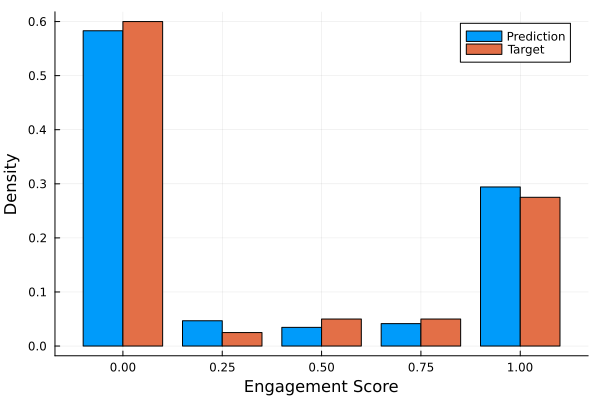

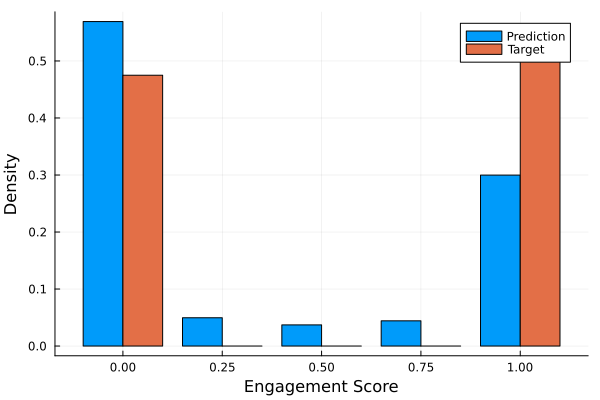

(kl_div, js_div) = (0.5969866935404645, 0.017621153951194013)
(kl_div, js_div) = (0.5968938555182941, 0.016302531008931438)
(kl_div, js_div) = (0.024150905047029325, 0.005830921993594789)
(kl_div, js_div) = (0.5856052000837054, 0.019828884037057164)
(kl_div, js_div) = (1.3913401693562442, 0.033356972912434155)
(kl_div, js_div) = (0.6037871027226572, 0.015450051636610455)
(kl_div, js_div) = (0.0688505855622786, 0.017520096568723397)
(kl_div, js_div) = (0.06571242230482909, 0.01545703088064956)
(kl_div, js_div) = (0.023824727155012708, 0.005420223073576633)
(kl_div, js_div) = (0.10581508933279613, 0.030074965977393772)
(kl_div, js_div) = (2.241637540713748, 0.06311927868600516)
(kl_div, js_div) = (1.5755001734556615, 0.04584571222503714)
(kl_div, js_div) = (0.6856494891312361, 0.018438802848413833)
(kl_div, js_div) = (0.8910903893450017, 0.03576716041156728)
(kl_div, js_div) = (0.5720270203214068, 0.015666042099532637)
(kl_div, js_div) = (0.9093443652684986, 0.04801739388180829)
(kl_div,


(display(highest_score_barplt), c_highest_loss) = (nothing, 0.06311927868600516)


(nothing, 0.06311927868600516)

In [ ]:
num_bins = 5 # Engagement score bins
#bin_edges = range(0.0-(1.0-0.0)/(2*(num_bins-1)), 1.0 + (1.0-0.0)/(2*(num_bins-1)), length=num_bins+1)
bin_edges = [-0.125, 0.125, 0.375, 0.625, 0.875, 1.125]

lowest_score_barplt = missing
highest_score_barplt = missing

c_lowest_loss = missing
c_highest_loss = missing

for i in 1:size(preds_df, 1) 
    art_preds = max.(liststr_to_arrayfloat64.(preds_df[!, :prediction])[i], 1e-9)
    art_targets = max.(liststr_to_arrayfloat64.(preds_df[!, :target])[i], 1e-9)

    kl_div = KLDivergence(art_preds, art_targets)
    js_div = JSDivergence(art_preds, art_targets)

    @show kl_div, js_div
    art_loss = kl_div

    if ismissing(c_lowest_loss) || art_loss <= c_lowest_loss

        ghist_data = cat(liststr_to_arrayfloat64.(preds_df[!, :prediction][i]), liststr_to_arrayfloat64.(preds_df[!, :target][i]), dims=1)
        ghist_score_vals = repeat(range(0.0, 1.0, num_bins), outer=2)
        ghist_groups = repeat(["Prediction", "Target"], inner=num_bins) 

        #@show size(ghist_groups), size(ghist_data)
        lowest_score_barplt = groupedbar(ghist_score_vals, ghist_data, group = ghist_groups, xlabel="Engagement Score", ylabel="Density", legend=true)
        c_lowest_loss = art_loss
    elseif ismissing(highest_score_barplt) || art_loss >= c_highest_loss

        ghist_data = cat(liststr_to_arrayfloat64.(preds_df[!, :prediction][i]), liststr_to_arrayfloat64.(preds_df[!, :target][i]), dims=1)
        ghist_score_vals = repeat(range(0.0, 1.0, num_bins), outer=2)
        ghist_groups = repeat(["Prediction", "Target"], inner=num_bins) 

        #@show size(ghist_groups), size(ghist_data)
        highest_score_barplt = groupedbar(ghist_score_vals, ghist_data, group = ghist_groups, xlabel="Engagement Score", ylabel="Density", legend=true)
        c_highest_loss = art_loss
    end
end

@show display(lowest_score_barplt), c_lowest_loss
@show display(highest_score_barplt), c_highest_loss


In [ ]:


art_filepath = "S:\\Sync\\University\\2023_MRP_1\\MRP1_WorkDir\\data\\annotated\\r_art_stratified_annotated.csv"
art_df = CSV.read(art_filepath, DataFrame)

@show names(art_df)

i = 7

#List for the article the top 5 contributing sentences with their attention weights
c_art_id = preds_df[!, :article_id][i]
c_art_headline = art_df[art_df[!, :article_id] .== c_art_id, :headline][1]
c_art_body = art_df[art_df[!, :article_id] .== c_art_id, :body][1]
#@show c_art_headline, c_art_body
c_art_subtexts = split(preds_df[!, :subtexts][i], "', '") #split(c_art_body, ".")
#@show c_art_subtexts
#c_art_subtexts = length(c_art_subtexts) <= 80 ? c_art_subtexts : c_art_subtexts[1:80]

attn_weights = liststr_to_arrayfloat64.(preds_df[!, :attention_weights][i])
#@show attn_weights
attn_df = DataFrame(:sentence=>c_art_subtexts, :attention_weight=>attn_weights) 
@show c_art_headline
sort(attn_df, :attention_weight, rev=true)

names(art_df) = ["article_id", "article_type", "from_where", "link", "post_id", "posted_by", "date_posted", "post_title", "post_body", "date", "author", "headline", "body", "char_count", "comments_ids", "num_tld_comments", "selected", "engagement_scores", "sentiment_scores", "avg_engagement_score", "avg_sentiment_score", "std_engagement_score", "std_sentiment_score", "engagement_score_sum", "sentiment_score_sum"]
c_art_headline = "IBM unveils its 433 qubit Osprey quantum computer"


Row,sentence,attention_weight
,SubStrin…,Float64
1,<s> “Now we’re ready to kind of move fast </s>,0.26916
2,<s> “We think we’re ready to do this experiment </s>,0.260411
3,<s> Now they turn to Rust </s>,0.135766
4,<s> </s>'],0.0944854
5,"<s> “They all get it and are very excited about it,” says Martinis </s>",0.0700889
6,"<s> “That process is all working,” says Martinis </s>",0.0446484
7,"<s> It’s something we can do now,” says Martinis </s>",0.0278713
8,<s> “Afterward you still have to figure out how to make it more scalable and programmable </s>,0.0190897
9,"<s> ” Designs for devices with 30 to 50 qubits are already in progress, he says </s>",0.00947174


In [ ]:

dirpath = "S:\\Sync\\University\\2023_MRP_1\\MRP1_WorkDir\\output_and_results\\"
filename = "alice_base_gated_predictions_batchsize_4_freezeEmbed.csv"

preds_df = CSV.read(joinpath(dirpath, filename), DataFrame; delim=";")

@show names(preds_df)
@show eltype.(eachcol(preds_df))

# Convert values from Strings to 1D arrays of Float64s
liststr_to_arrayfloat64(x) = parse.(Float64, split(replace(x, "[" => "", "]" => ""), ","))
#nestedliststr_to_arrayfloat64(x) = parse.(Float64,[el[3:end-1] for el in split(x[2:end-1], ",")])


@show liststr_to_arrayfloat64.(preds_df[!, :prediction])

names(preds_df) = ["article_id", "subtexts", "prediction", "target", "error", "attention_weights"]
eltype.(eachcol(preds_df)) = DataType[String, String, String, String, String, String]
liststr_to_arrayfloat64.(preds_df[!, :prediction]) = [[0.5178713202476501, 0.059670764952898026, 0.053791143000125885, 0.058735448867082596, 0.30993133783340454], [0.48325443267822266, 0.07346425950527191, 0.06607834994792938, 0.0720730572938919, 0.30512991547584534], [0.6241149306297302, 0.040515076369047165, 0.03370397165417671, 0.03829425200819969, 0.2633717656135559], [0.5564513802528381, 0.0552634634077549, 0.047567468136548996, 0.053799115121364594, 0.286918580532074], [0.5660895109176636, 0.048420801758766174, 0.04209049418568611, 0.04721531271934509, 0.29618391394615173], [0.6184388995170593, 0.039861273020505905, 0.03335236757993698, 0.03782770037651062, 0.27051979303359985], [0.6150364875793457, 0.04393593966960907, 0.036531075835227966, 0.04151253029704094, 0.26298394799232483], [0.55029058456

25-element Vector{Vector{Float64}}:
 [0.5178713202476501, 0.059670764952898026, 0.053791143000125885, 0.058735448867082596, 0.30993133783340454]
 [0.48325443267822266, 0.07346425950527191, 0.06607834994792938, 0.0720730572938919, 0.30512991547584534]
 [0.6241149306297302, 0.040515076369047165, 0.03370397165417671, 0.03829425200819969, 0.2633717656135559]
 [0.5564513802528381, 0.0552634634077549, 0.047567468136548996, 0.053799115121364594, 0.286918580532074]
 [0.5660895109176636, 0.048420801758766174, 0.04209049418568611, 0.04721531271934509, 0.29618391394615173]
 [0.6184388995170593, 0.039861273020505905, 0.03335236757993698, 0.03782770037651062, 0.27051979303359985]
 [0.6150364875793457, 0.04393593966960907, 0.036531075835227966, 0.04151253029704094, 0.26298394799232483]
 [0.550290584564209, 0.047798238694667816, 0.0423731729388237, 0.04696589335799217, 0.31257209181785583]
 [0.5744494795799255, 0.043428849428892136, 0.03777087852358818, 0.042748596519231796, 0.30160218477249146]
 [0.

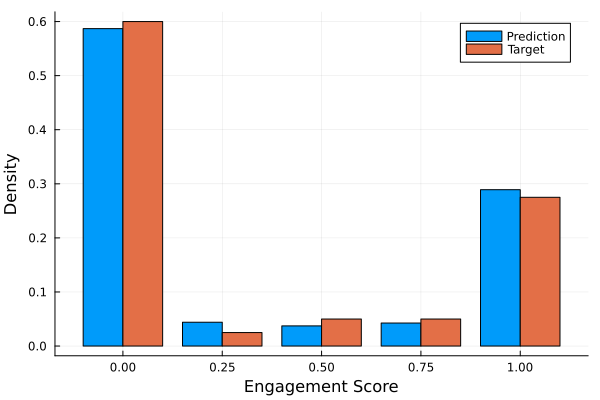

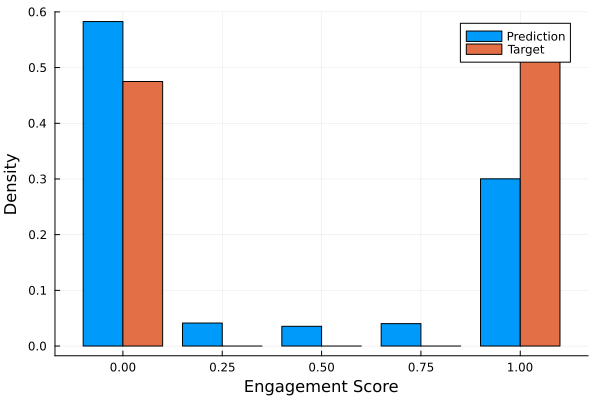

(kl_div, js_div) = (0.9262160242007885, 0.023644325842401066)
(kl_div, js_div) = (1.1280935210993825, 0.02400905772841256)
(kl_div, js_div) = (0.031792293859649615, 0.008029975447636895)
(kl_div, js_div) = (0.8484659734763584, 0.029538679456634902)
(kl_div, js_div) = (1.5018256557982572, 0.035250345228726554)
(kl_div, js_div) = (0.563627288211366, 0.016592557845022796)
(kl_div, js_div) = (0.0854747125569171, 0.02178707280128423)
(kl_div, js_div) = (0.07997450468253259, 0.018811559640994485)
(kl_div, js_div) = (0.01706708075075042, 0.003986052476745796)
(kl_div, js_div) = (0.11822488053046332, 0.0332648988680615)
(kl_div, js_div) = (1.99846256639746, 0.058825304881773975)
(kl_div, js_div) = (1.3074241978082213, 0.04463535683690771)
(kl_div, js_div) = (0.7165789710964677, 0.017857940101818213)
(kl_div, js_div) = (0.7320783029709189, 0.039507675020916705)
(kl_div, js_div) = (0.7064984708859866, 0.020885613553618537)
(kl_div, js_div) = (0.8512987769147053, 0.043285464626853724)
(kl_div, js

(display(highest_score_barplt), c_highest_loss) = (nothing, 1.99846256639746)


(nothing, 1.99846256639746)

In [ ]:
num_bins = 5 # Engagement score bins
#bin_edges = range(0.0-(1.0-0.0)/(2*(num_bins-1)), 1.0 + (1.0-0.0)/(2*(num_bins-1)), length=num_bins+1)
bin_edges = [-0.125, 0.125, 0.375, 0.625, 0.875, 1.125]

lowest_score_barplt = missing
highest_score_barplt = missing

c_lowest_loss = missing
c_highest_loss = missing

for i in 1:size(preds_df, 1) 
    art_preds = max.(liststr_to_arrayfloat64.(preds_df[!, :prediction])[i], 1e-9)
    art_targets = max.(liststr_to_arrayfloat64.(preds_df[!, :target])[i], 1e-9)

    kl_div = KLDivergence(art_preds, art_targets)
    js_div = JSDivergence(art_preds, art_targets)

    @show kl_div, js_div
    art_loss = kl_div

    if ismissing(c_lowest_loss) || art_loss <= c_lowest_loss

        ghist_data = cat(liststr_to_arrayfloat64.(preds_df[!, :prediction][i]), liststr_to_arrayfloat64.(preds_df[!, :target][i]), dims=1)
        ghist_score_vals = repeat(range(0.0, 1.0, num_bins), outer=2)
        ghist_groups = repeat(["Prediction", "Target"], inner=num_bins) 

        #@show size(ghist_groups), size(ghist_data)
        lowest_score_barplt = groupedbar(ghist_score_vals, ghist_data, group = ghist_groups, xlabel="Engagement Score", ylabel="Density", legend=true)
        c_lowest_loss = art_loss
    elseif ismissing(highest_score_barplt) || art_loss >= c_highest_loss

        ghist_data = cat(liststr_to_arrayfloat64.(preds_df[!, :prediction][i]), liststr_to_arrayfloat64.(preds_df[!, :target][i]), dims=1)
        ghist_score_vals = repeat(range(0.0, 1.0, num_bins), outer=2)
        ghist_groups = repeat(["Prediction", "Target"], inner=num_bins) 

        #@show size(ghist_groups), size(ghist_data)
        highest_score_barplt = groupedbar(ghist_score_vals, ghist_data, group = ghist_groups, xlabel="Engagement Score", ylabel="Density", legend=true)
        c_highest_loss = art_loss
    end
end

@show display(lowest_score_barplt), c_lowest_loss
@show display(highest_score_barplt), c_highest_loss


In [1]:
using StatsPlots
using DataFrames
using CSV
using Statistics

In [2]:
dirpath = "S:\\Sync\\University\\2023_MRP_1\\MRP1_WorkDir\\output_and_results\\"
#filename = "simpreg_mean_predictions.csv"
filename = "simpreg_reghead_mean_predictions.csv"

#filename = "gp_reghead_mean_predictions.csv"


preds_df = CSV.read(joinpath(dirpath, filename), DataFrame)

@show names(preds_df)
@show eltype.(eachcol(preds_df))

# Convert values from Strings to 1D arrays of Float64s
liststr_to_arrayfloat64(x) = parse.(Float64, split(x[2:end-1], ","))


names(preds_df) = ["article_id", "subtexts", "prediction", "target", "error", "attention_weights"]


eltype.(eachcol(preds_df)) = DataType[String, String, String31, String31, String31, Missing]


liststr_to_arrayfloat64 (generic function with 1 method)

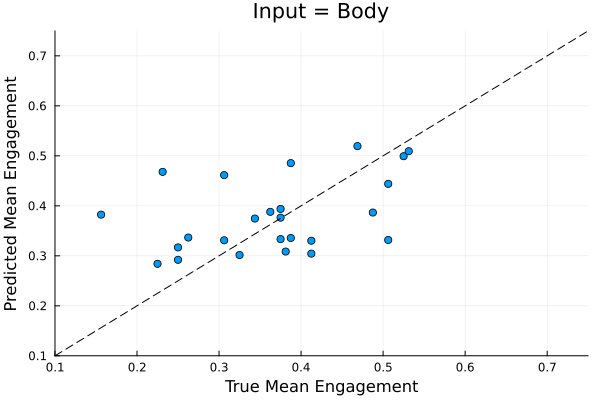

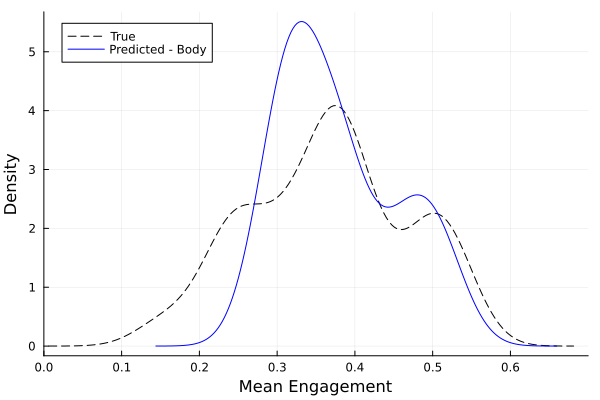

size(preds) = (25,)
preds = [0.3302064836025238, 0.37628570199012756, 0.30438023805618286, 0.291998952627182, 0.4614174962043762, 0.38800689578056335, 0.3865812122821808, 0.4679434299468994, 0.4854147434234619, 0.33569395542144775, 0.4992402493953705, 0.5092591643333435, 0.33655714988708496, 0.44395527243614197, 0.3937608599662781, 0.38240286707878113, 0.519411027431488, 0.31679949164390564, 0.33106786012649536, 0.331656813621521, 0.28399989008903503, 0.3015819191932678, 0.33342307806015015, 0.3085288107395172, 0.3745560050010681]

In [3]:
#KDE plot of the distribution of predicted mean engagement scores
preds = [pred[1] for pred in liststr_to_arrayfloat64.(preds_df[!, :prediction])]
@show size(preds)
@show preds

labels = [label[1] for label in liststr_to_arrayfloat64.(preds_df[!, :target])]


scat = scatter(labels, preds, xlabel="True Mean Engagement", ylabel="Predicted Mean Engagement", legend=false, title="Input = Body")
#Diagonal line y=x
plot!(scat, [0.0, 1.0], [0.0, 1.0], label="Ideal", color=:black, linestyle=:dash)
xlims!(scat, (0.1, 0.75))
ylims!(scat, (0.1, 0.75))
display(scat)

density_plt = density(labels,color=:black, linestyle=:dash, label="True", legend=:topleft, xlabel="Mean Engagement", ylabel="Density")
density!(density_plt, preds, label="Predicted - Body", color=:blue)
xlims!(density_plt, (0.0, 0.7))
display(density_plt)



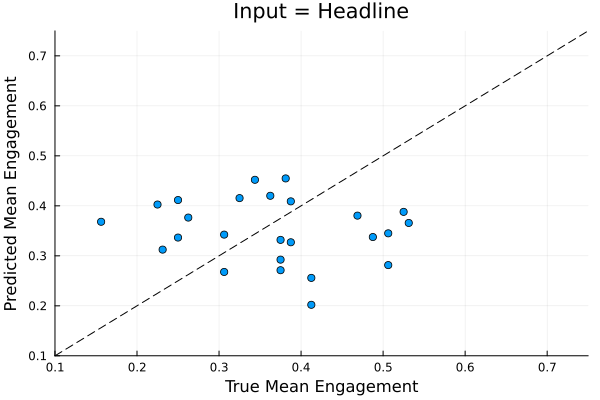

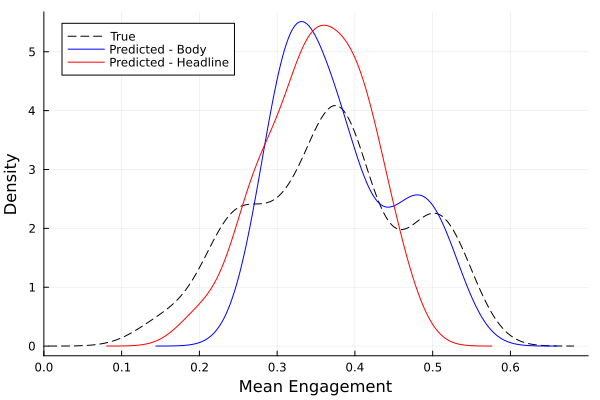

In [4]:
#Other regressors: VarGP
filename = "simpreg_reghead_headline_predictions.csv"
preds_df = CSV.read(joinpath(dirpath, filename), DataFrame)
preds = [pred[1] for pred in liststr_to_arrayfloat64.(preds_df[!, :prediction])]

scat = scatter(labels, preds, xlabel="True Mean Engagement", ylabel="Predicted Mean Engagement", legend=false, title="Input = Headline")
#Diagonal line y=x
plot!(scat, [0.0, 1.0], [0.0, 1.0], label="Ideal", color=:black, linestyle=:dash)
xlims!(scat, (0.1, 0.75))
ylims!(scat, (0.1, 0.75))
display(scat)

density!(density_plt, preds, label="Predicted - Headline", color=:red)
#xlims!(density_plt, (0.0, 0.7))
display(density_plt)


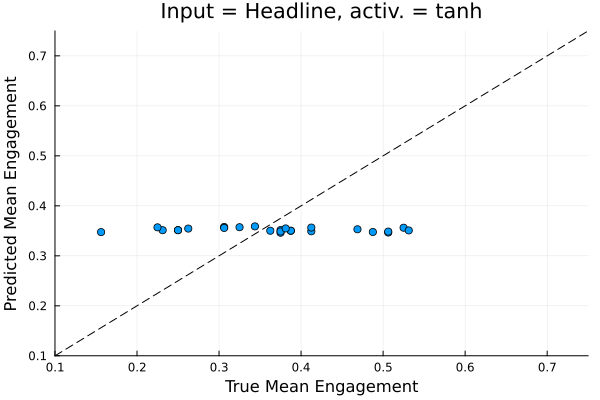

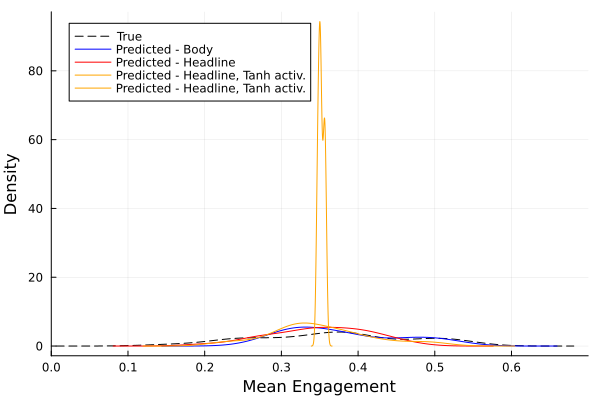

In [6]:
#Other regressors: VarGP
filename = "gp_reghead_mean_predictions.csv"
preds_df = CSV.read(joinpath(dirpath, filename), DataFrame)
preds = [pred[1] for pred in liststr_to_arrayfloat64.(preds_df[!, :prediction])]

scat = scatter(labels, preds, xlabel="True Mean Engagement", ylabel="Predicted Mean Engagement", legend=false, title="Input = Headline, activ. = tanh")
#Diagonal line y=x
plot!(scat, [0.0, 1.0], [0.0, 1.0], label="Ideal", color=:black, linestyle=:dash)
xlims!(scat, (0.1, 0.75))
ylims!(scat, (0.1, 0.75))
display(scat)

density!(density_plt, preds, label="Predicted - Headline, Tanh activ.", color=:orange)
#xlims!(density_plt, (0.0, 0.7))
display(density_plt)

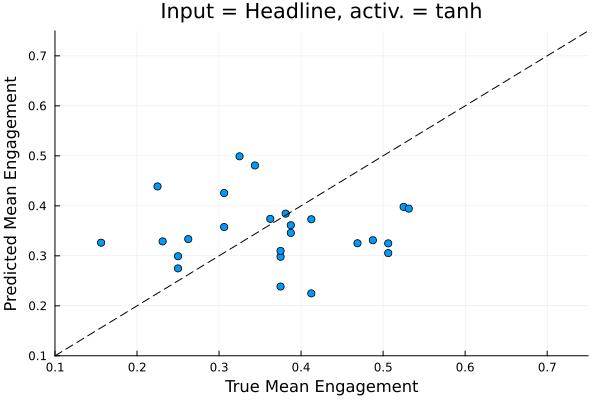

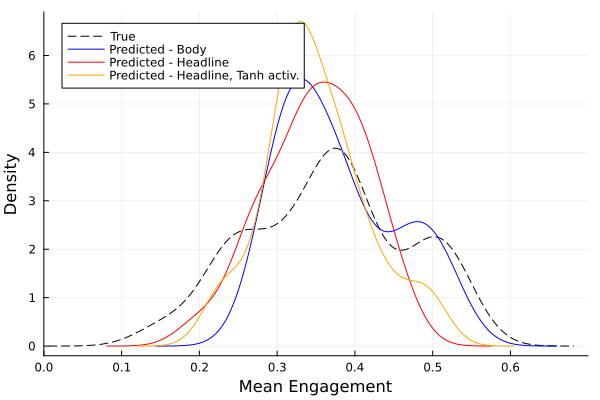

In [5]:
#Other regressors: VarGP
filename = "simpreg_reghead_headline_tanh_predictions.csv"
preds_df = CSV.read(joinpath(dirpath, filename), DataFrame)
preds = [pred[1] for pred in liststr_to_arrayfloat64.(preds_df[!, :prediction])]

scat = scatter(labels, preds, xlabel="True Mean Engagement", ylabel="Predicted Mean Engagement", legend=false, title="Input = Headline, activ. = tanh")
#Diagonal line y=x
plot!(scat, [0.0, 1.0], [0.0, 1.0], label="Ideal", color=:black, linestyle=:dash)
xlims!(scat, (0.1, 0.75))
ylims!(scat, (0.1, 0.75))
display(scat)

density!(density_plt, preds, label="Predicted - Headline, Tanh activ.", color=:orange)
#xlims!(density_plt, (0.0, 0.7))
display(density_plt)